# Definitive 1.1 9/12/24

# Create empty folder in this directory named Figures

In [2]:
import pandas as pd
import os
from sklearn import preprocessing
from sklearn import decomposition
from sklearn import metrics
from sklearn import manifold
from sklearn import discriminant_analysis
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time

# Task 1.1: EDA for binary classification.

Explore the data to generate summary statistics and plots that help the reader understand
the data, with a focus on information relevant to the classification task.

In [3]:
# Load Data
def load_data(file_path):
    return pd.read_csv(file_path, compression='gzip')


In [4]:
file_path = "Datasets/data1.csv.gz" 
label_column = "label" 

# Load the dataset
df = load_data(file_path)

In [40]:
print(df.shape)
df[0:5]


(5471, 4124)


,label,DPM1,NIPAL3,KRIT1,LAP3,CD99,MAD1L1,LASP1,M6PR,CFLAR,...,CISD3,DDX52,GGNBP2,C11orf98,MRPL45,TRG.AS1,EBLN3P,TRBV7.2,AC010642.2,POLR2J3.1
0,TREG,0.000000,0.0,0.0,0.0,4.459588,0.000000,4.175754,3.107406,3.107406,...,0.000000,0.000000,0.000000,3.777941,0.000000,0.000000,0.000000,0.000000,3.107406,0.000000
1,TREG,0.000000,0.0,0.0,0.0,3.159469,3.159469,0.000000,0.000000,3.159469,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.484917,0.000000,0.000000
2,CD4+T,3.568377,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.568377,0.000000,0.000000,0.000000,0.000000
3,CD4+T,2.574454,0.0,0.0,0.0,3.228759,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.574454,0.000000,0.000000,2.574454,0.000000,2.574454,0.000000,0.000000,2.574454
4,CD4+T,0.000000,0.0,0.0,0.0,0.000000,3.418392,0.000000,0.000000,0.000000,...,2.757484,0.000000,3.418392,0.000000,0.000000,2.757484,3.418392,0.000000,0.000000,0.000000


In [36]:
# Gets df that is True if 0 then takes mean across columns.
# All columns but the first one which is the label

sparsity_X = (df == 0).mean().iloc[1:]

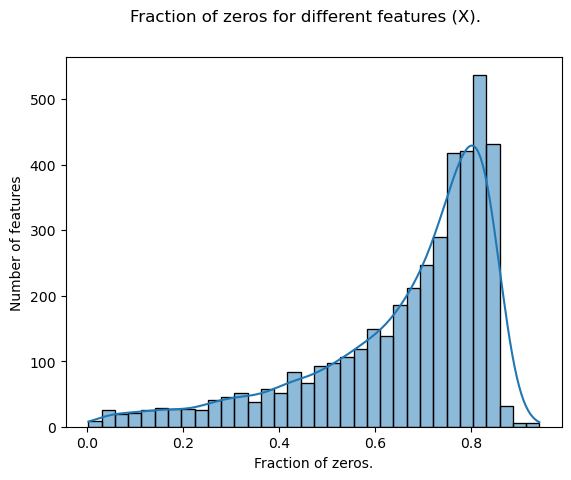

In [29]:
fig, ax = plt.subplots()

ax = sns.histplot(data=sparsity_X, kde=True)

fig.suptitle("Fraction of zeros for different features (X).")

ax.set_ylabel("Number of features")

ax.set_xlabel("Fraction of zeros.")

fig.savefig("Figures/t11_sparsity.pdf")

plt.show()

In [11]:
# No missing values
sum(df.isna().sum())

0

Is the data balanced?

In [30]:
# Not fully balanced.

df["label"].value_counts()

label
CD4+T    3356
TREG     2115
Name: count, dtype: int64

## PCA for visual analysis.

In [31]:

# Separate x and y

regressors = df.columns.to_list()
regressors.remove("label")
regressors[0:5] #All regressors, label removed.

#Scaling is supposed to be important for PCA.

X = df[regressors]

scaler = preprocessing.StandardScaler()
scaler.fit(X)

X_standardized = scaler.transform(X)

#This is PCA
pca = decomposition.PCA(n_components=2)
pca_x_component = pca.fit_transform(X_standardized)

df_pca_x = pd.DataFrame(pca_x_component)

#Concatenate labels to columns 
df_pca_x = pd.concat([df['label'],df_pca_x],axis=1)

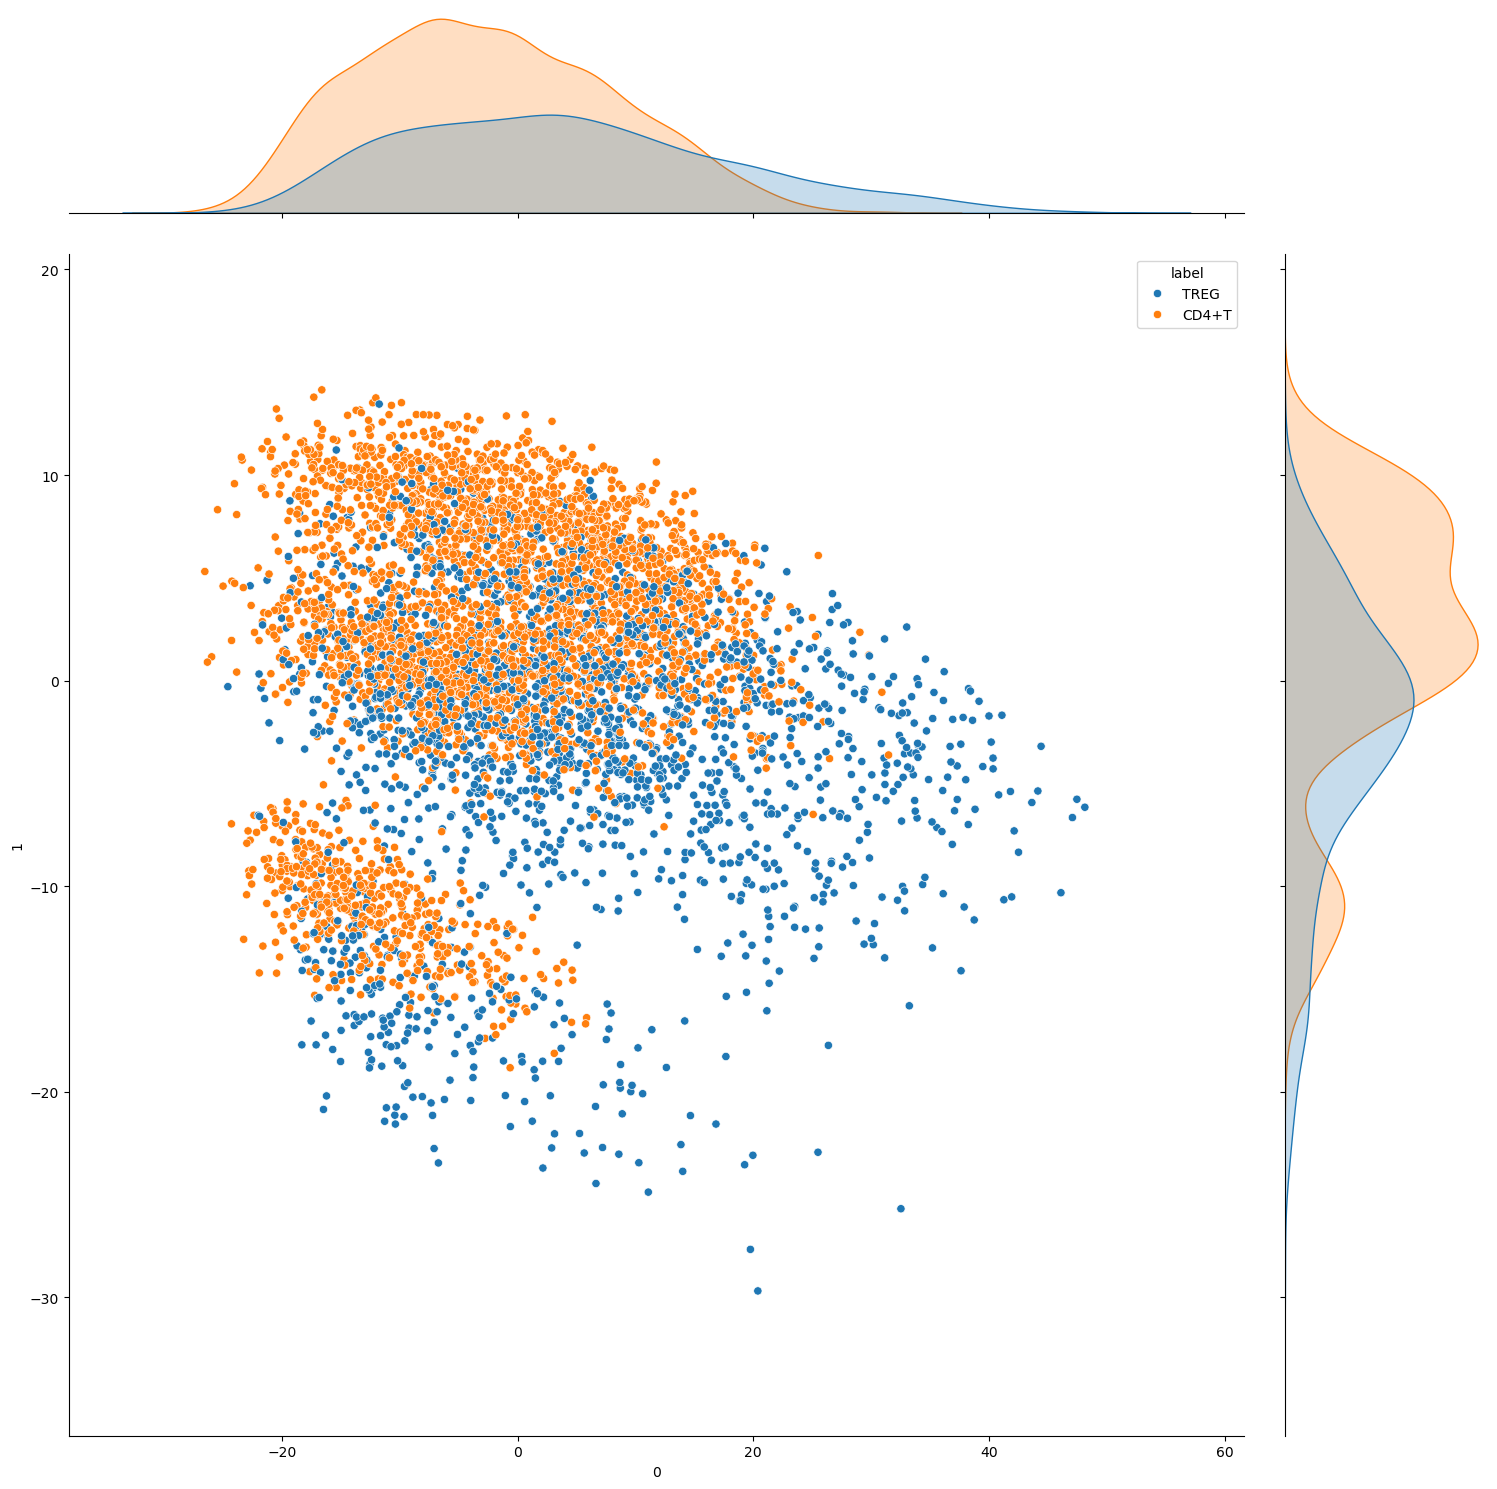

In [35]:
# Not in final report.
sns.jointplot(data=df_pca_x, x=0, y=1, hue="label",height=15)


## Screeplot: important for 1.2 and 1.3

In [42]:
pca = decomposition.PCA()
pca_x_component = pca.fit(X_standardized)
pca_x_component.explained_variance_ratio_

array([3.70794885e-02, 1.25490862e-02, 9.36711600e-03, ...,
       3.81536048e-06, 3.66958665e-06, 3.59648403e-06])

In [ ]:
scree_data = pca_x_component.explained_variance_ratio_

# Cum sum to do scree plot
scree_data = scree_data.cumsum()

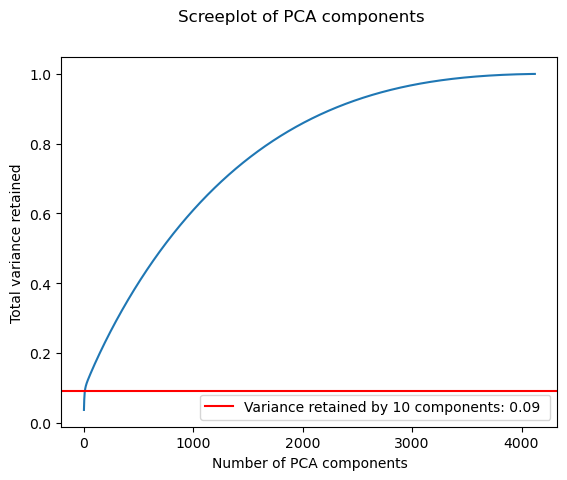

In [65]:
fig, ax = plt.subplots()      

ax.plot(scree_data)

ax.axhline(scree_data[9], 
           color = 'r', 
           label = f'Variance retained by 10 components: {round(scree_data[9],2)} '
          )

ax.set_ylabel("Total variance retained")

ax.set_xlabel("Number of PCA components")

ax.legend(loc="lower right")

fig.suptitle("Screeplot of PCA components")

fig.savefig("Figures/t11_screeplot.pdf")

plt.show()

# Flexible dimensionality reduction algorithms: t-SNE

Roughly similar across different random states and levels of perplexity 10-40.
Classes are roughly separable but there are some points in areas where the other class's density is much higher than the one observed.

In [93]:
# Set perplexity one for some beautfiul art.
X_embedded = manifold.TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=30,random_state=42).fit_transform(X_standardized)


X_tsne = pd.DataFrame(X_embedded)

df_tsne_2 = pd.concat([df['label'],X_tsne],axis=1)



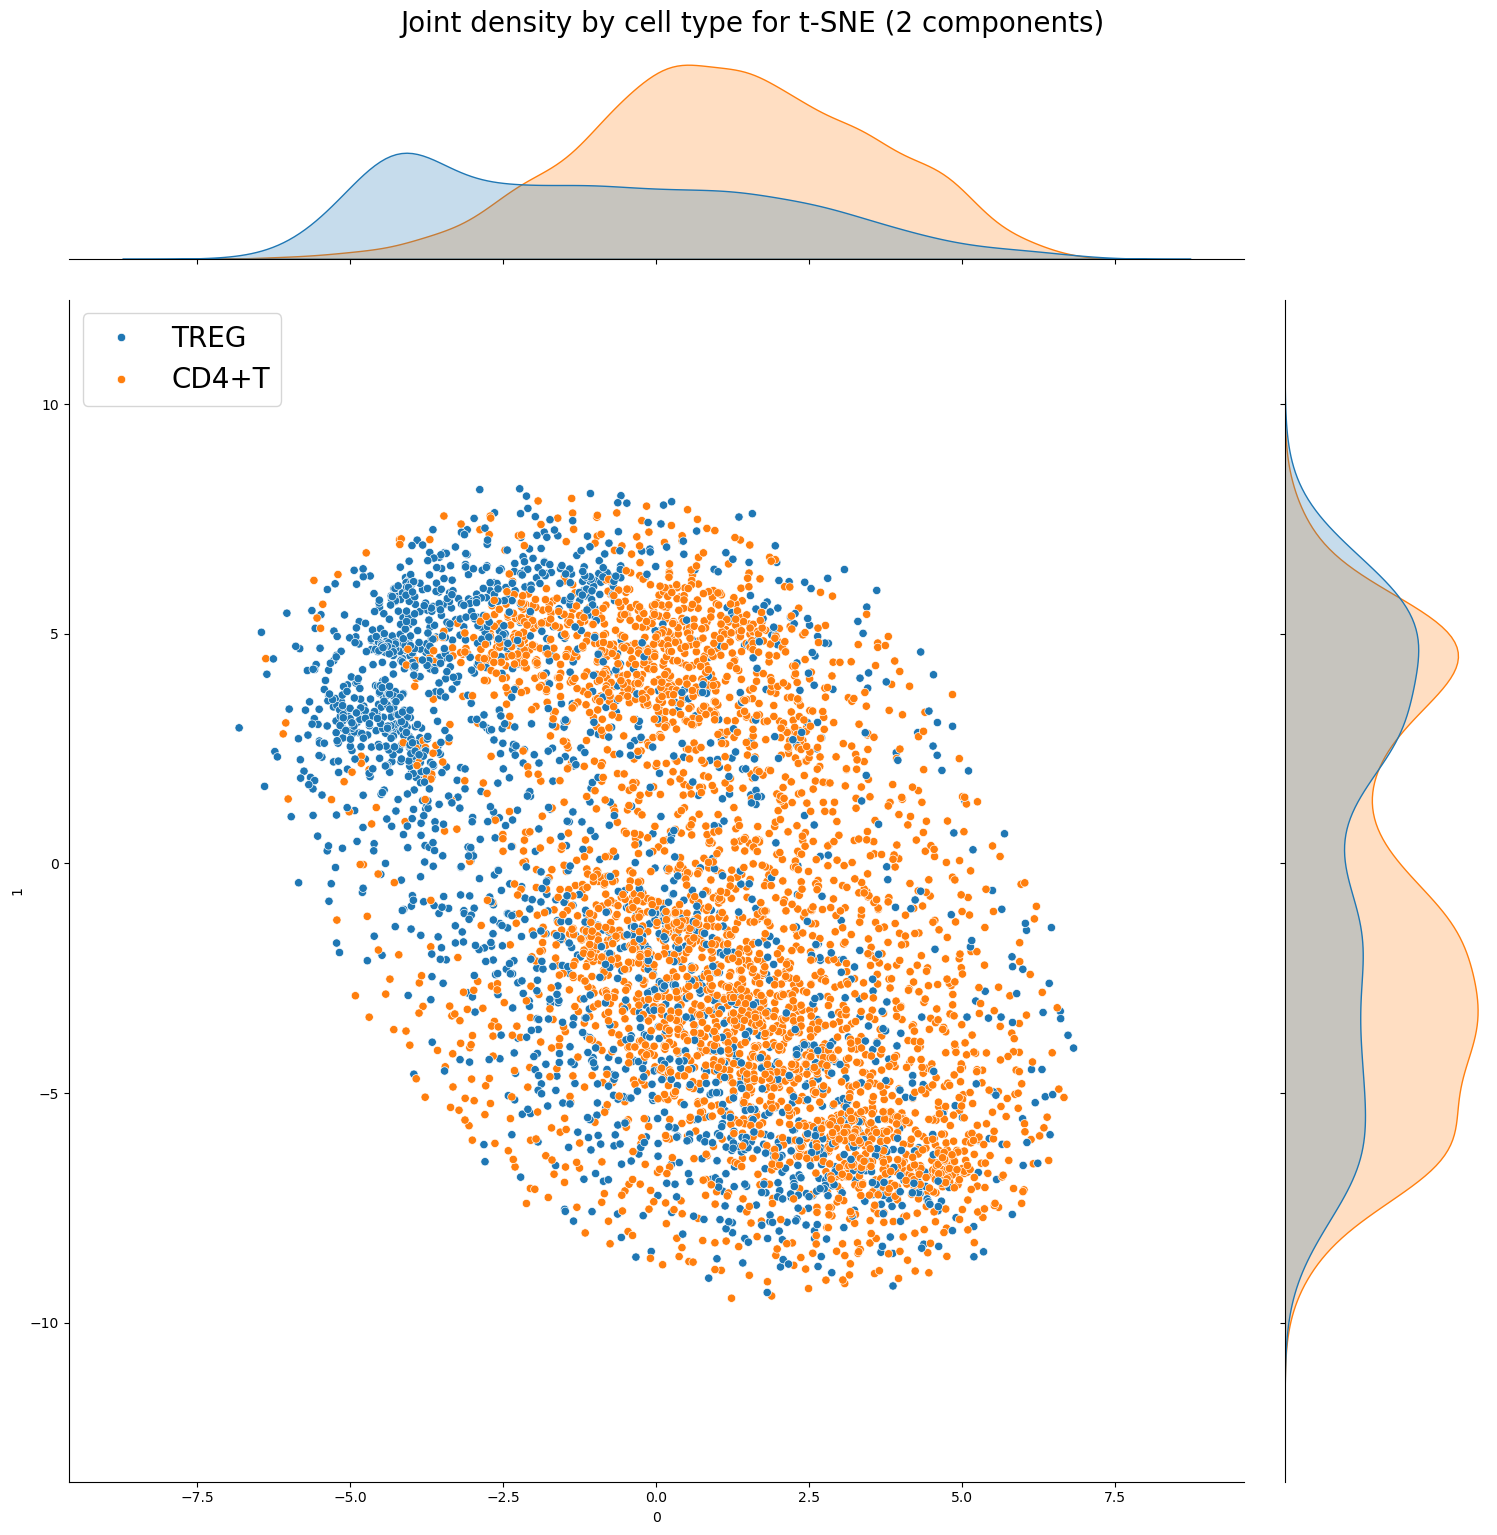

In [100]:
fig = sns.jointplot(data=df_tsne_2, x=0, y=1, hue="label",height=15).figure

fig.suptitle("Joint density by cell type for t-SNE (2 components)",fontsize=20 ,y = 1.02)

plt.legend( fontsize="20", loc ="upper left")
#Solution from: https://stackoverflow.com/questions/36813396/how-to-show-the-title-for-the-diagram-of-seaborn-pairplot-or-pridgrid

plt.savefig("Figures/t11_joint_tsne.pdf")

plt.show()
